<a href="https://colab.research.google.com/github/masoom-alam/FMML_2024/blob/main/FMML_M3L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [2]:
cancer = datasets.load_breast_cancer(as_frame=True)

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
X = cancer.data
y = cancer.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [7]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

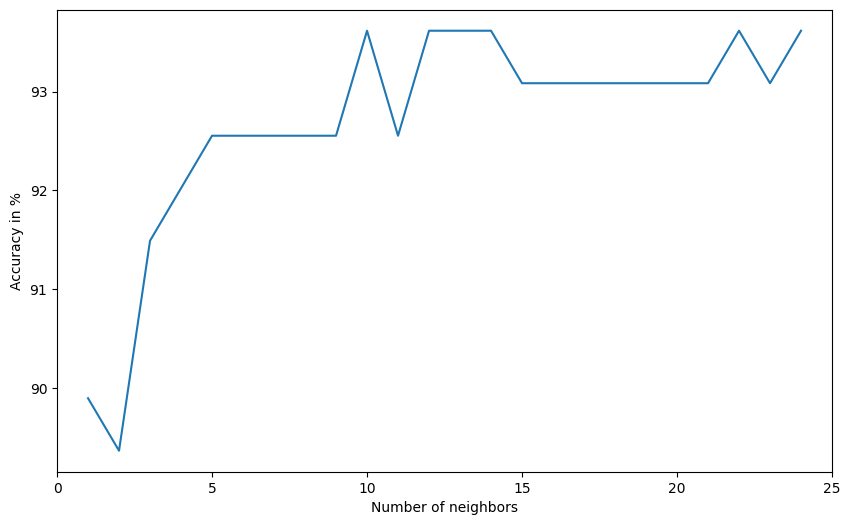

In [8]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [9]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

93.61702127659575
[10, 12, 13, 14, 22, 24]


In [10]:
## AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores = predicted
  fpr, tpr, threshold = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

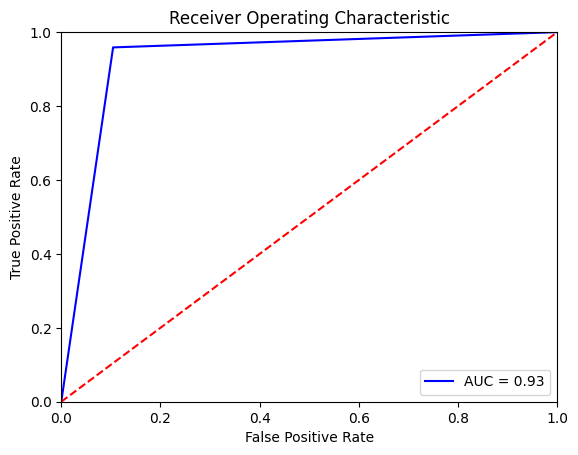

In [11]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
plot_roc(y_test,predictions)

In [12]:
## Changing the random_state value here so that data is split differently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)


In [13]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

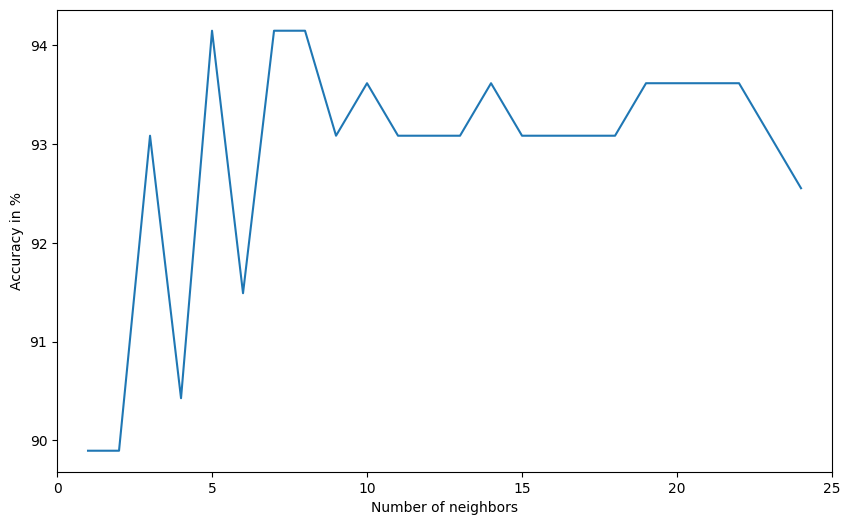

In [14]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [15]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

94.14893617021278
[5, 7, 8]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [17]:
from sklearn.model_selection import KFold
from statistics import mean
kf = KFold(n_splits=10)
cv_scores = []
neighbors = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighbors.append(k)
  acclist = []
  for train_index, test_index in kf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclist.append(knn.score(x_test_fold, y_test_fold))
  cv_scores.append(mean(acclist))

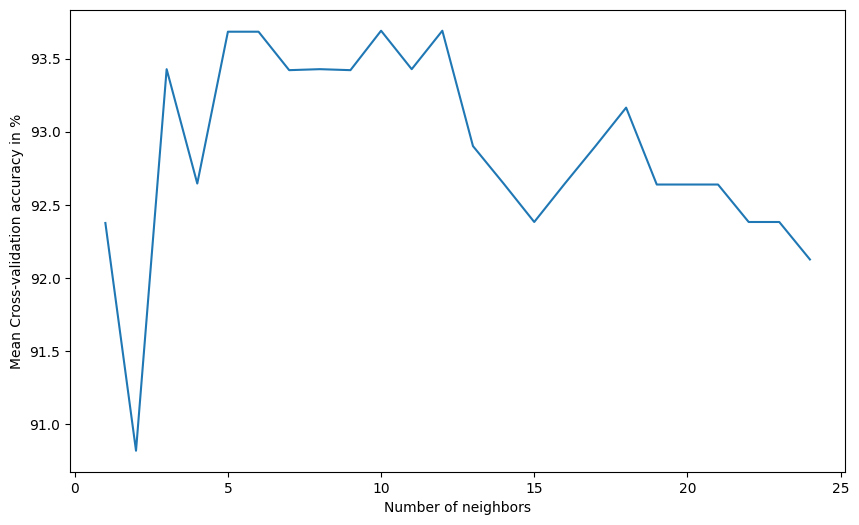

In [18]:
Accuracy = [x*100 for x in cv_scores]

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

In [19]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(optimal_ks)

[10, 12]


#Stratified K FOLD


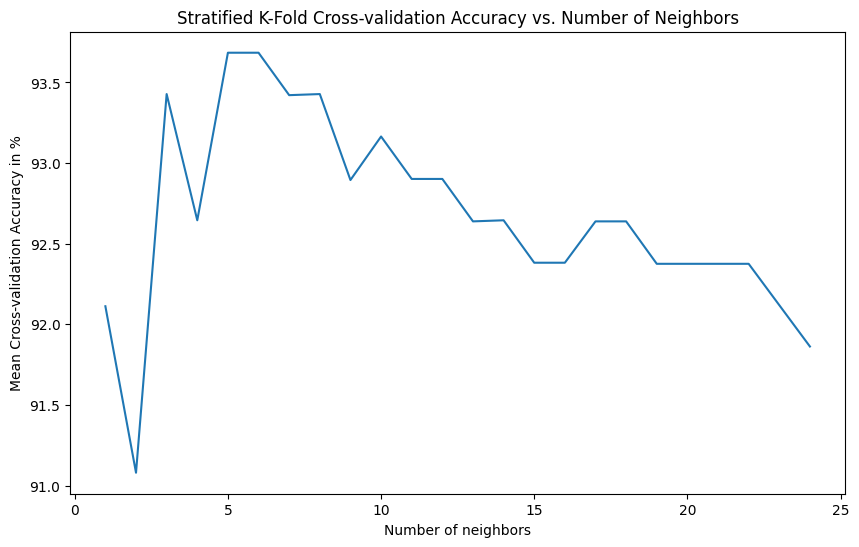

Optimal k values: [5, 6]


In [20]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean

# Initialize Stratified KFold with 10 splits
skf = StratifiedKFold(n_splits=10)

cv_scores = []
neighbors = []

# Loop over different values of k
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    neighbors.append(k)
    acclist = []

    # Stratified KFold split
    for train_index, test_index in skf.split(X_train, y_train):
        x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        knn.fit(x_train_fold, y_train_fold)
        acclist.append(knn.score(x_test_fold, y_test_fold))

    cv_scores.append(mean(acclist))  # Calculate mean accuracy for each k

# Convert the accuracy to percentage
Accuracy = [x * 100 for x in cv_scores]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation Accuracy in %')
plt.title('Stratified K-Fold Cross-validation Accuracy vs. Number of Neighbors')
plt.show()

# Determine the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print("Optimal k values:", optimal_ks)


In [21]:
X = cancer.data
y = cancer.target

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [24]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

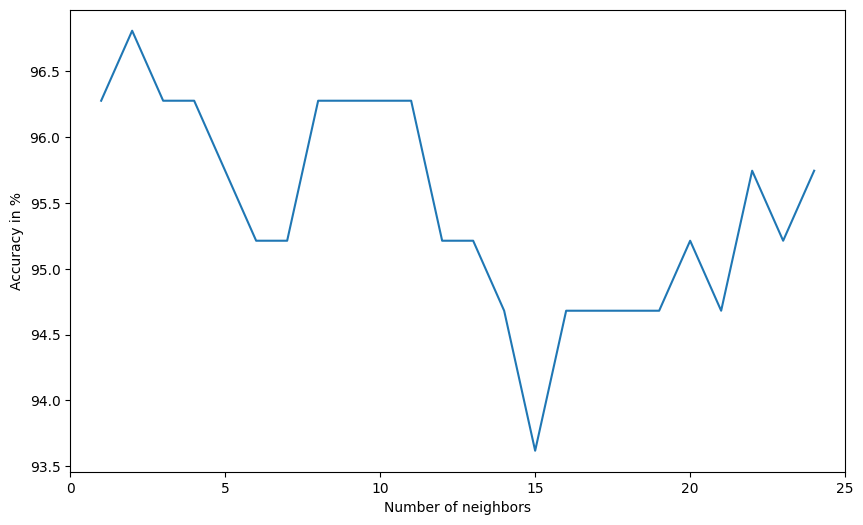

In [25]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [26]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)


96.80851063829788
[2]


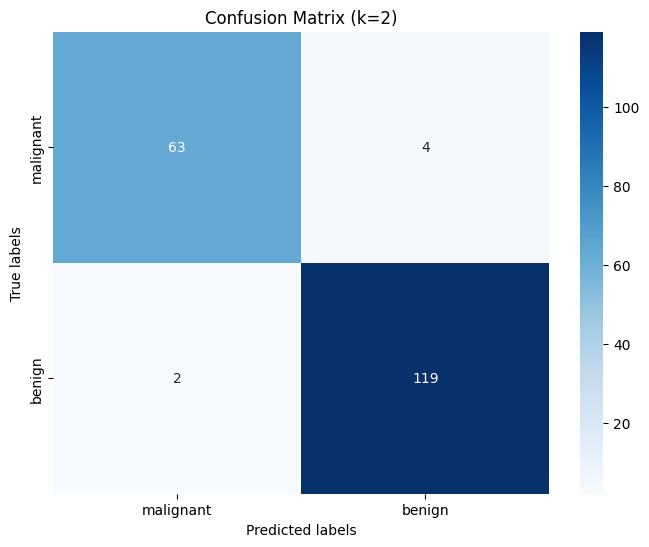

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        67
      benign       0.97      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.96       188
weighted avg       0.97      0.97      0.97       188



In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming the optimal k was found (let's say it is 10 from your previous analysis)
optimal_k = optimal_ks[0]  # Use the first optimal value if there are multiple
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title(f'Confusion Matrix (k={optimal_k})')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Print Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred, target_names=cancer.target_names)
print("Classification Report:\n", report)


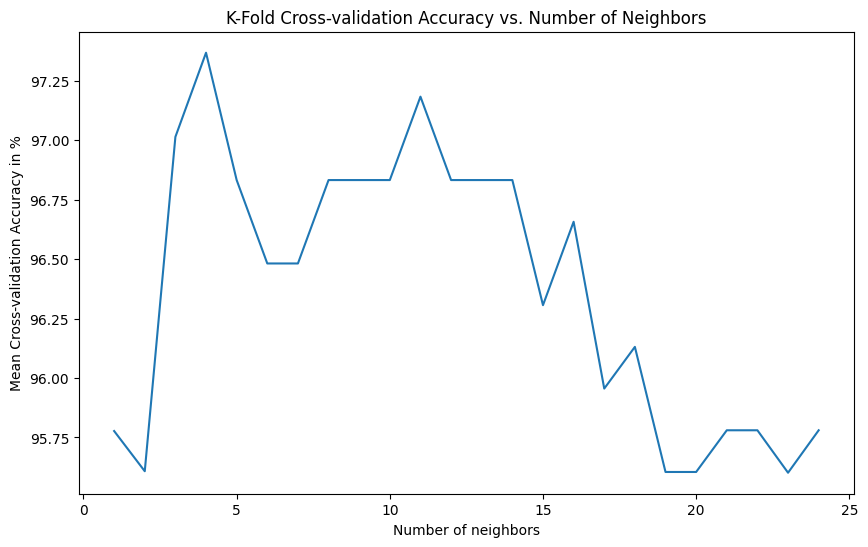

Optimal k values: [4]
Maximum mean cross-validation accuracy: 97.36842105263158


In [28]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from statistics import mean
import matplotlib.pyplot as plt

# Initialize K-Fold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=17)

# Create a list to store the accuracy scores
cv_scores = []
neighbors = []

# Loop over different values of k (1 to 24)
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    neighbors.append(k)
    acclist = []

    # Perform K-Fold Cross-Validation
    for train_index, test_index in kf.split(X_scaled, y):
        X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # Train and evaluate the KNN model
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)
        acclist.append(accuracy_score(y_test_fold, y_pred))  # Store accuracy for each fold

    # Calculate the mean accuracy for each k
    cv_scores.append(mean(acclist))

# Convert the accuracy to percentage
Accuracy = [x * 100 for x in cv_scores]

# Plot Accuracy vs. Number of Neighbors (k)
plt.figure(figsize=(10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation Accuracy in %')
plt.title('K-Fold Cross-validation Accuracy vs. Number of Neighbors')
plt.show()

# Print the optimal k based on the maximum mean accuracy
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print("Optimal k values:", optimal_ks)
print("Maximum mean cross-validation accuracy:", max_acc)


Shape of X_train_2d: (381, 2)
Shape of y_train: (381,)


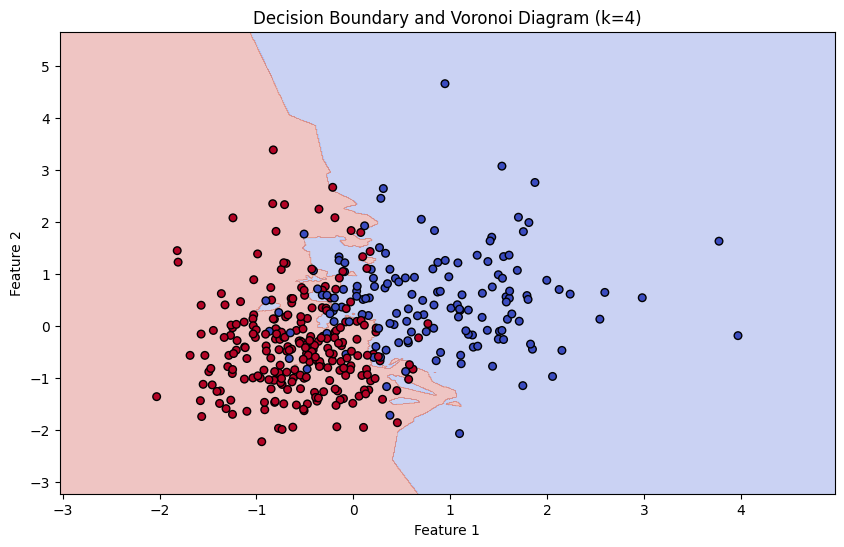

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Use the optimal k value from Task-3 (let's assume it's optimal_k)
optimal_k = optimal_ks[0]  # Replace with your actual optimal k value

# Initialize the KNN classifier with the optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Use only the first two features of the scaled data for visualization
X_train_2d = X_train[:, :2]  # Select the first two features for training
X_test_2d = X_test[:, :2]    # Select the first two features for testing

# Check that the shapes are consistent
print(f"Shape of X_train_2d: {X_train_2d.shape}")
print(f"Shape of y_train: {y_train.shape}")

# Train the model using these two features
knn.fit(X_train_2d, y_train)

# Create a mesh grid to plot the decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Plot the decision boundary using contour
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=30, edgecolors='k', cmap='coolwarm')
plt.title(f'Decision Boundary and Voronoi Diagram (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


1. Train-Validation-Test Split: Pros and Cons
Pros:

Simplicity: Splitting the dataset into three sets (train, validation, test) is simple and easy to understand. The process involves a clear separation of training, tuning (via validation), and final evaluation.
Reduced Computational Cost: This method is less computationally expensive than K-Fold cross-validation because you're only training and validating once, as opposed to multiple times in cross-validation.
Final Evaluation on Unseen Data: By keeping the test set completely separate, you can evaluate the final performance of your model on a set of data it has never seen before, giving a fair estimate of its generalization capability.
Cons:

Risk of Poor Performance Estimation: Since the model is validated on only one subset of the data (the validation set), this evaluation might not be representative of the model's performance across the entire dataset. If the validation set is not representative, it can lead to overfitting or underfitting.
Possible Data Bias: Depending on how the data is split, the validation set might not contain the full variability of the data, leading to biased hyperparameter tuning. The result can be an overfitting on the validation set or an inaccurate model assessment.
Waste of Data: Since you're using only a part of your data for validation, there’s less data available for training the model, which could hurt performance, especially with small datasets.

K-Fold Cross Validation is considered a non-exhaustive cross-validation method.

Justification:

Non-Exhaustive: K-Fold cross-validation involves splitting the dataset into K subsets (or "folds"), and each fold is used exactly once as the validation set while the remaining K-1 folds are used for training. This process is repeated for all K folds. However, at no point does any particular data point appear in both the training and validation sets at the same time, meaning that every fold is used for validation exactly once, but not for multiple rounds simultaneously.
Why non-exhaustive?

K-Fold does not reuse data within a single iteration; once a fold is used for validation, it is not used again during that round of training. The data points are exhausted across all rounds, but each data point is only used once in the validation set.